<a href="https://colab.research.google.com/github/RickyF404/Tesi/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url_no_temp = "https://drive.google.com/uc?id=1jerpsOqjogEnnriBkHOrDDEeh1wJry_o"
output_no_temp = "data_no_temperature.csv"
gdown.download(url_no_temp, output_no_temp)

url_temp = " https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH"
output_temp = "data_temperature.csv"
gdown.download(url_temp, output_temp)

# Dataset senza temperatura

Percentile 98.5

In [ ]:
df = pd.read_csv("/content/data_no_temperature.csv", parse_dates=["timestamp"])
df = df.sort_values("timestamp")
results = []

df["month"] = df["timestamp"].dt.to_period("M")

# cols_features = [c for c in df.columns if c not in ("timestamp", "month")]

#Normalizzazione
# X = StandardScaler().fit_transform(df[cols_features])


#training su mesi consecutivi
months = sorted(df["month"].unique())

for i in range(1, len(months)):
  train_months = months[:i]
  val_months = months[i:]

  train_data = df[df["month"].isin(train_months)]
  val_data = df[df["month"].isin(val_months)]

  #preprocessing
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_data.drop(columns = ["timestamp", "month"]))
  X_val = scaler.transform(val_data.drop(columns = ["timestamp", "month"]))


  pca = PCA(n_components = 0.95)
  X_train_pca = pca.fit_transform(X_train)
  X_train_reconstructed = pca.inverse_transform(X_train_pca)
  train_err = np.mean((X_train - X_train_reconstructed)**2, axis = 1)
  threshold = np.percentile(train_err, 98.5)

  X_val_pca = pca.transform(X_val)
  X_val_reconstructed = pca.inverse_transform(X_val_pca)
  val_err = np.mean((X_val - X_val_reconstructed)**2, axis = 1)

  anomaly_rate = np.mean(val_err > threshold)
  results.append((i, anomaly_rate))

for i, rate in results:
  print(f"{i} mesi -> anomaly rate: {rate:.2%}")

/tmp/ipython-input-1836639023.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["timestamp"].dt.to_period("M")


1 mesi -> anomaly rate: 12.11%
2 mesi -> anomaly rate: 7.09%
3 mesi -> anomaly rate: 31.44%
4 mesi -> anomaly rate: 8.72%
5 mesi -> anomaly rate: 13.74%
6 mesi -> anomaly rate: 3.85%
7 mesi -> anomaly rate: 2.29%
8 mesi -> anomaly rate: 2.48%
9 mesi -> anomaly rate: 1.33%
10 mesi -> anomaly rate: 2.01%
11 mesi -> anomaly rate: 1.64%
12 mesi -> anomaly rate: 1.80%
13 mesi -> anomaly rate: 2.28%
14 mesi -> anomaly rate: 1.83%
15 mesi -> anomaly rate: 2.37%
16 mesi -> anomaly rate: 2.54%
17 mesi -> anomaly rate: 2.82%
18 mesi -> anomaly rate: 4.51%
19 mesi -> anomaly rate: 8.16%


Percentile 99

In [ ]:
df = pd.read_csv("/content/data_no_temperature.csv", parse_dates=["timestamp"])
df = df.sort_values("timestamp")
results = []

df["month"] = df["timestamp"].dt.to_period("M")

# cols_features = [c for c in df.columns if c not in ("timestamp", "month")]

#Normalizzazione
# X = StandardScaler().fit_transform(df[cols_features])


#training su mesi consecutivi
months = sorted(df["month"].unique())

for i in range(1, len(months)):
  train_months = months[:i]
  val_months = months[i:]

  train_data = df[df["month"].isin(train_months)]
  val_data = df[df["month"].isin(val_months)]

  #preprocessing
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_data.drop(columns = ["timestamp", "month"]))
  X_val = scaler.transform(val_data.drop(columns = ["timestamp", "month"]))

  pca = PCA(n_components = 0.95)
  X_train_pca = pca.fit_transform(X_train)
  X_train_reconstructed = pca.inverse_transform(X_train_pca)
  train_err = np.mean((X_train - X_train_reconstructed)**2, axis = 1)
  threshold = np.percentile(train_err, 99)

  X_val_pca = pca.transform(X_val)
  X_val_reconstructed = pca.inverse_transform(X_val_pca)
  val_err = np.mean((X_val - X_val_reconstructed)**2, axis = 1)

  anomaly_rate = np.mean(val_err > threshold)
  results.append((i, anomaly_rate))

for i, rate in results:
  print(f"{i} mesi -> anomaly rate: {rate:.2%}")

/tmp/ipython-input-1459207288.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["timestamp"].dt.to_period("M")


1 mesi -> anomaly rate: 9.68%
2 mesi -> anomaly rate: 4.16%
3 mesi -> anomaly rate: 27.57%
4 mesi -> anomaly rate: 6.59%
5 mesi -> anomaly rate: 11.13%
6 mesi -> anomaly rate: 2.63%
7 mesi -> anomaly rate: 1.33%
8 mesi -> anomaly rate: 1.69%
9 mesi -> anomaly rate: 0.93%
10 mesi -> anomaly rate: 1.31%
11 mesi -> anomaly rate: 1.08%
12 mesi -> anomaly rate: 1.24%
13 mesi -> anomaly rate: 1.46%
14 mesi -> anomaly rate: 1.46%
15 mesi -> anomaly rate: 1.91%
16 mesi -> anomaly rate: 1.76%
17 mesi -> anomaly rate: 1.81%
18 mesi -> anomaly rate: 3.32%
19 mesi -> anomaly rate: 6.12%


# Dataset con temperatura

In [ ]:
df = pd.read_csv("/content/data_temperature.csv", parse_dates=["timestamp"])
df = df.sort_values("timestamp")
results = []

df["month"] = df["timestamp"].dt.to_period("M")

# cols_features = [c for c in df.columns if c not in ("timestamp", "month")]

#Normalizzazione
# X = StandardScaler().fit_transform(df[cols_features])


#training su mesi consecutivi
months = sorted(df["month"].unique())

for i in range(1, len(months)):
  train_months = months[:i]
  val_months = months[i:]

  train_data = df[df["month"].isin(train_months)]
  val_data = df[df["month"].isin(val_months)]

  #preprocessing
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_data.drop(columns = ["timestamp", "month"]))
  X_val = scaler.transform(val_data.drop(columns = ["timestamp", "month"]))

  pca = PCA(n_components = 0.95)
  X_train_pca = pca.fit_transform(X_train)
  X_train_reconstructed = pca.inverse_transform(X_train_pca)
  train_err = np.mean((X_train - X_train_reconstructed)**2, axis = 1)
  threshold = np.percentile(train_err, 98.5)

  X_val_pca = pca.transform(X_val)
  X_val_reconstructed = pca.inverse_transform(X_val_pca)
  val_err = np.mean((X_val - X_val_reconstructed)**2, axis = 1)

  anomaly_rate = np.mean(val_err > threshold)
  results.append((i, anomaly_rate))

for i, rate in results:
  print(f"{i} mesi -> anomaly rate: {rate:.2%}")

/tmp/ipython-input-984004225.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["timestamp"].dt.to_period("M")


1 mesi -> anomaly rate: 45.29%
2 mesi -> anomaly rate: 12.66%
3 mesi -> anomaly rate: 53.03%
4 mesi -> anomaly rate: 11.33%
5 mesi -> anomaly rate: 24.93%
6 mesi -> anomaly rate: 18.37%
7 mesi -> anomaly rate: 1.87%
8 mesi -> anomaly rate: 1.27%
9 mesi -> anomaly rate: 1.34%
10 mesi -> anomaly rate: 1.57%
11 mesi -> anomaly rate: 1.64%
12 mesi -> anomaly rate: 1.56%
13 mesi -> anomaly rate: 1.70%
14 mesi -> anomaly rate: 1.48%
15 mesi -> anomaly rate: 1.86%
16 mesi -> anomaly rate: 2.01%
17 mesi -> anomaly rate: 2.86%
18 mesi -> anomaly rate: 3.20%
19 mesi -> anomaly rate: 3.95%


# Finestre temporali senza temperatura

In [ ]:
df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]

In [ ]:
def anomaly_rate_PCA(train_df, valid_df, features):
  scaler = StandardScaler()
  # scaler = RobustScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  pca = PCA(n_components = 0.95)
  X_train_pca = pca.fit_transform(X_train)
  X_train_reconstructed = pca.inverse_transform(X_train_pca)
  train_err = np.mean((X_train - X_train_reconstructed)**2, axis = 1)
  threshold = np.percentile(train_err, 98.5)

  X_val_pca = pca.transform(X_val)
  X_val_reconstructed = pca.inverse_transform(X_val_pca)
  val_err = np.mean((X_val - X_val_reconstructed)**2, axis = 1)
  anomaly_rate = np.mean(val_err > threshold)

  return anomaly_rate

In [ ]:
def create_fake_month(df, frac_per_month, random_state):
  rng = np.random.default_rng(seed=random_state) # generatore casuale con seed
  df["day"] = df["timestamp"].dt.floor("D")
  df["year_month"] = df["timestamp"].dt.to_period("M")
  train_indices = []

  for ym, group in df.groupby("year_month"):
    days = group["day"].unique()
    n_take = max(1, int(len(days) * frac_per_month))
    sampled_days = rng.choice(days, size=n_take, replace=False)
    sel = group[group["day"].isin(sampled_days)].index.tolist()
    train_indices += sel

  train_df = df.loc[train_indices].copy()
  valid_df = df.drop(index=train_indices).copy()
  train_df = train_df.drop(columns=["day", "year_month"])
  valid_df = valid_df.drop(columns=["day", "year_month"])
  train_df = train_df.sort_values("timestamp")
  valid_df = valid_df.sort_values("timestamp")

  return train_df, valid_df

2 mesi di dati reali

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  valid_df = df[~df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_PCA(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months] , "window_size": len(train_months), "anomaly rate": anomaly})

results_df_2m = pd.DataFrame(results)
print(results_df_2m)

          train_months  window_size  anomaly rate
0   [2024-01, 2024-02]            2      0.068025
1   [2024-02, 2024-03]            2      0.298581
2   [2024-03, 2024-04]            2      0.278217
3   [2024-04, 2024-05]            2      0.055080
4   [2024-05, 2024-06]            2      0.027646
5   [2024-06, 2024-07]            2      0.060406
6   [2024-07, 2024-08]            2      0.063684
7   [2024-08, 2024-09]            2      0.116865
8   [2024-09, 2024-10]            2      0.110059
9   [2024-10, 2024-11]            2      0.045437
10  [2024-11, 2024-12]            2      0.041436


4 mesi di dati reali

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  valid_df = df[~df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_PCA(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months] , "window_size": len(train_months), "anomaly rate": anomaly})

results_df_4m = pd.DataFrame(results)
print(results_df_4m)

                           train_months  window_size  anomaly rate
0  [2024-01, 2024-02, 2024-03, 2024-04]            4      0.092596
1  [2024-02, 2024-03, 2024-04, 2024-05]            4      0.035726
2  [2024-03, 2024-04, 2024-05, 2024-06]            4      0.058692
3  [2024-04, 2024-05, 2024-06, 2024-07]            4      0.032795
4  [2024-05, 2024-06, 2024-07, 2024-08]            4      0.046922
5  [2024-06, 2024-07, 2024-08, 2024-09]            4      0.025048
6  [2024-07, 2024-08, 2024-09, 2024-10]            4      0.067748
7  [2024-08, 2024-09, 2024-10, 2024-11]            4      0.020189
8  [2024-09, 2024-10, 2024-11, 2024-12]            4      0.011305


6 mesi di dati reali

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  valid_df = df[~df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_PCA(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months] ,  "window_size": len(train_months), "anomaly rate": anomaly})

results_df_6m = pd.DataFrame(results)
print(results_df_6m)

                                        train_months  window_size  \
0  [2024-01, 2024-02, 2024-03, 2024-04, 2024-05, ...            6   
1  [2024-02, 2024-03, 2024-04, 2024-05, 2024-06, ...            6   
2  [2024-03, 2024-04, 2024-05, 2024-06, 2024-07, ...            6   
3  [2024-04, 2024-05, 2024-06, 2024-07, 2024-08, ...            6   
4  [2024-05, 2024-06, 2024-07, 2024-08, 2024-09, ...            6   
5  [2024-06, 2024-07, 2024-08, 2024-09, 2024-10, ...            6   
6  [2024-07, 2024-08, 2024-09, 2024-10, 2024-11, ...            6   

   anomaly rate  
0      0.047176  
1      0.036775  
2      0.025295  
3      0.021097  
4      0.074342  
5      0.017766  
6      0.038791  


2 mesi di dati falsi

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results_2m_fake = []
train_df, valid_df = create_fake_month(df_original, frac_per_month=0.1, random_state=42)

print("Giorni training:", train_df["timestamp"].dt.date.nunique())
print("Giorni validation:", valid_df["timestamp"].dt.date.nunique())

anomaly = anomaly_rate_PCA(train_df, valid_df, features)
results_2m_fake.append({"window_size": 2, "anomaly": anomaly})

results_df_2m_fake = pd.DataFrame(results_2m_fake)
print(results_df_2m_fake)

Giorni training: 57
Giorni validation: 547
   window_size   anomaly
0            2  0.017197


4 mesi di dati falsi

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results_4m_fake = []

train_df, valid_df = create_fake_month(df_original, frac_per_month=0.2, random_state=42)

print("Giorni training:", train_df["timestamp"].dt.date.nunique())
print("Giorni validation:", valid_df["timestamp"].dt.date.nunique())

anomaly = anomaly_rate_PCA(train_df, valid_df, features)
results_4m_fake.append({"window_size": 4, "anomaly": anomaly})

results_df_4m_fake = pd.DataFrame(results_4m_fake)
print(results_df_4m_fake)

Giorni training: 117
Giorni validation: 487
   window_size   anomaly
0            4  0.015041


6 mesi di dati falsi

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results_6m_fake = []

train_df, valid_df = create_fake_month(df_original, frac_per_month=0.3, random_state=42)

print("Giorni training:", train_df["timestamp"].dt.date.nunique())
print("Giorni validation:", valid_df["timestamp"].dt.date.nunique())

anomaly = anomaly_rate_PCA(train_df, valid_df, features)
results_6m_fake.append({"window_size": 6, "anomaly": anomaly})

results_df_6m_fake = pd.DataFrame(results_6m_fake)
print(results_df_6m_fake)

Giorni training: 177
Giorni validation: 427
   window_size   anomaly
0            6  0.015173


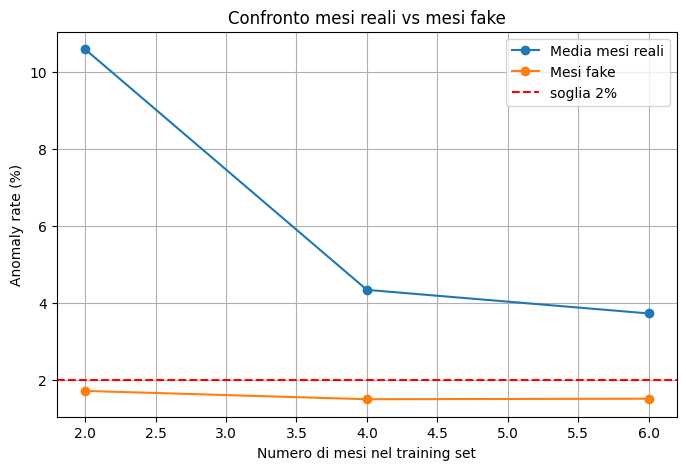

In [ ]:
real_results_df = pd.concat([results_df_2m, results_df_4m, results_df_6m])
real_mean = real_results_df.groupby("window_size")["anomaly rate"].mean().reset_index()

fake_results_df = pd.concat([results_df_2m_fake, results_df_4m_fake, results_df_6m_fake])

plt.figure(figsize=(8,5))
plt.plot(real_mean["window_size"], real_mean["anomaly rate"]*100, "o-", label="Media mesi reali")
plt.plot(fake_results_df["window_size"], fake_results_df["anomaly"]*100, "o-", label="Mesi fake")
plt.axhline(2, color="r", linestyle="--", label="soglia 2%")
plt.xlabel("Numero di mesi nel training set")
plt.ylabel("Anomaly rate (%)")
plt.title("Confronto mesi reali vs mesi fake")
plt.legend()
plt.grid(True)

plt.show()

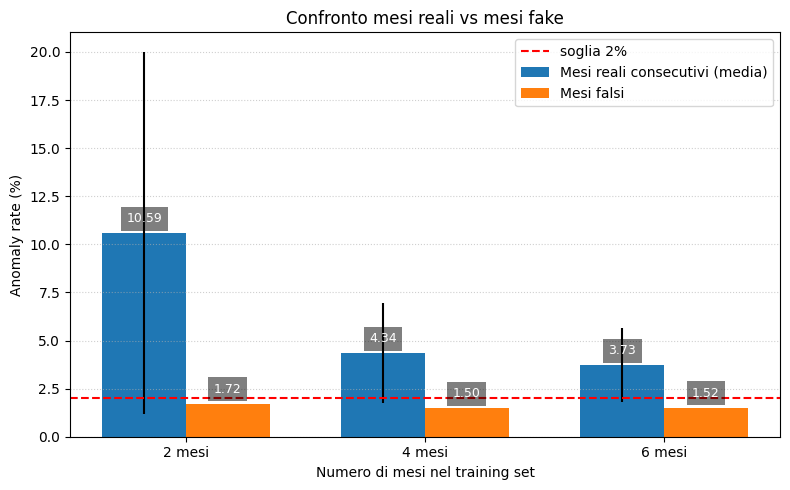

In [ ]:
labels = ["2 mesi", "4 mesi", "6 mesi"]
real_results_df = pd.concat([results_df_2m, results_df_4m, results_df_6m])
real_mean = real_results_df.groupby("window_size")["anomaly rate"].mean().reset_index()
real_std = real_results_df.groupby("window_size")["anomaly rate"].std().reset_index()

fake_results_df = pd.concat([results_df_2m_fake, results_df_4m_fake, results_df_6m_fake])

x = np.arange(len(labels))
w = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - w/2, real_mean["anomaly rate"]*100, w, yerr= real_std["anomaly rate"]*100, label="Mesi reali consecutivi (media)")
bars2 = ax.bar(x + w/2, fake_results_df["anomaly"]*100, w, label="Mesi falsi")
ax.axhline(2, color="r", linestyle="--", label="soglia 2%")
ax.set_xlabel("Numero di mesi nel training set")
ax.set_ylabel("Anomaly rate (%)")
ax.set_title("Confronto mesi reali vs mesi fake")

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis="y", linestyle=":", alpha=0.6)

def add_labels(bars):
  for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.4,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="white",
        bbox = dict(facecolor="black", alpha=0.5, edgecolor="none")
    )

add_labels(bars1)
add_labels(bars2)
plt.tight_layout()
plt.show()

# Finestre temporali con temperatura

In [ ]:
df_temp = pd.read_csv("/content/data_temperature.csv", encoding = "utf-8")
df_temp["timestamp"] = pd.to_datetime(df_temp["timestamp"])
df_temp["timestamp"] = df_temp["timestamp"].dt.tz_localize(None)
df_temp = df_temp.sort_values("timestamp")

end = "2025-01-01"
new_df = df_temp[(df_temp["timestamp"] < end)]

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6", "temperatura"]
results = []
window_size = 2
n_months = 12
start_date = new_df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = new_df[(new_df["timestamp"] >= train_start) & (new_df["timestamp"] < train_end)]

  valid_df = new_df[~new_df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_PCA(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months] , "anomaly rate 0.01": anomaly})

results_df = pd.DataFrame(results)
print(results_df)

          train_months  anomaly rate 0.01
0   [2024-01, 2024-02]           0.112739
1   [2024-02, 2024-03]           0.421079
2   [2024-03, 2024-04]           0.042930
3   [2024-04, 2024-05]           0.191821
4   [2024-05, 2024-06]           0.036222
5   [2024-06, 2024-07]           0.465863
6   [2024-07, 2024-08]           0.587136
7   [2024-08, 2024-09]           0.250991
8   [2024-09, 2024-10]           0.124648
9   [2024-10, 2024-11]           0.091642
10  [2024-11, 2024-12]           0.171793


In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6", "temperatura"]
results = []
window_size = 4
n_months = 12
start_date = new_df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = new_df[(new_df["timestamp"] >= train_start) & (new_df["timestamp"] < train_end)]

  valid_df = new_df[~new_df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_PCA(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months] , "anomaly rate 0.01": anomaly})

results_df = pd.DataFrame(results)
print(results_df)

                           train_months  anomaly rate 0.01
0  [2024-01, 2024-02, 2024-03, 2024-04]           0.116696
1  [2024-02, 2024-03, 2024-04, 2024-05]           0.147328
2  [2024-03, 2024-04, 2024-05, 2024-06]           0.047528
3  [2024-04, 2024-05, 2024-06, 2024-07]           0.019487
4  [2024-05, 2024-06, 2024-07, 2024-08]           0.051853
5  [2024-06, 2024-07, 2024-08, 2024-09]           0.044388
6  [2024-07, 2024-08, 2024-09, 2024-10]           0.583015
7  [2024-08, 2024-09, 2024-10, 2024-11]           0.179298
8  [2024-09, 2024-10, 2024-11, 2024-12]           0.166667


In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6", "temperatura"]
results = []
window_size = 6
n_months = 12
start_date = new_df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = new_df[(new_df["timestamp"] >= train_start) & (new_df["timestamp"] < train_end)]

  valid_df = new_df[~new_df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_PCA(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months] , "anomaly rate 0.01": anomaly})

results_df = pd.DataFrame(results)
print(results_df)

                                        train_months  anomaly rate 0.01
0  [2024-01, 2024-02, 2024-03, 2024-04, 2024-05, ...           0.210493
1  [2024-02, 2024-03, 2024-04, 2024-05, 2024-06, ...           0.049034
2  [2024-03, 2024-04, 2024-05, 2024-06, 2024-07, ...           0.016231
3  [2024-04, 2024-05, 2024-06, 2024-07, 2024-08, ...           0.015823
4  [2024-05, 2024-06, 2024-07, 2024-08, 2024-09, ...           0.047579
5  [2024-06, 2024-07, 2024-08, 2024-09, 2024-10, ...           0.105330
6  [2024-07, 2024-08, 2024-09, 2024-10, 2024-11, ...           0.013931
